In [1]:
from sklearn.datasets import fetch_openml
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from models import *
from sklearn import svm
from tqdm.notebook import tqdm
import time
from sklearn.neighbors import KNeighborsClassifier

In [2]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame = False)
y = y.astype(np.int)

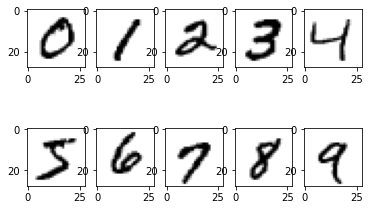

In [3]:
showMnistExamples(X, y, 0)

# Logistic Regression

In [ ]:
model = LogisticRegression(penalty='l1', solver='saga', max_iter=100, tol=1)
mc = MNISTClassifier(model, X, y)

In [ ]:
print(mc.modelScore)

0.9113714285714286


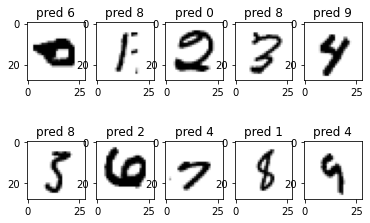

In [ ]:
mc.showWrongOnes(2)

In [ ]:
scores = mc.getCrossValidateScore()
print("%0.2f accuracy with a standard deviation of %0.8f" % (scores.mean(), scores.std()))


0.91 accuracy with a standard deviation of 0.00490868


# SVM

In [ ]:
Cs = [1e1,7,5,3,1]
kernels = ["poly", 'rbf']
scmax = 0
best_kernel = ""
bestC = 0
with tqdm(total=100) as pbar:
    for C in Cs:
        for kernel in kernels:
            model = svm.SVC(C=C, kernel=kernel, tol=1)
            mcf = MNISTClassifier(model, X[:5000], y[:5000], fitting=False)
            sc = mcf.getCrossValidateScore().mean()
            if sc > scmax:
                scmax = sc
                best_kernel = kernel
                bestC = C    
            pbar.update(100 / (len(Cs) * len(kernels)))

print(f'score for {scmax} {bestC} {best_kernel}')


score for 0.9536 5 rbf


На всех данных

0.9832571428571428


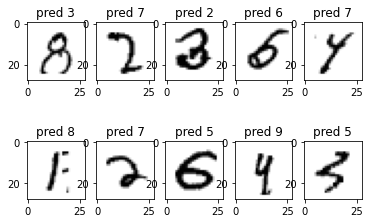

In [5]:
model = svm.SVC(C=5, kernel='rbf', tol=1)
mcf = MNISTClassifier(model, X, y)
print(mcf.modelScore)
mcf.showWrongOnes(0)

# KNN

In [9]:
neighbours = [1,3,5,7]
scmax = 0
best_neighbors = 0
for neighbour in neighbours:
    knn = KNeighborsClassifier(n_neighbors=neighbour)
    mcf = MNISTClassifier(knn, X[:5000], y[:5000])
    sc = mcf.getCrossValidateScore().mean()
    if sc > scmax:
        scmax = sc
        best_neighbors = neighbour

print(f'score for {scmax} {best_neighbors} ')

score for 0.932 1 


0.9731428571428572


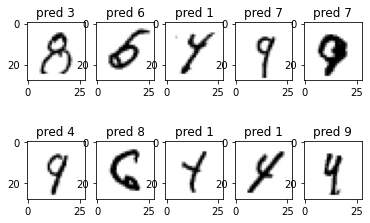

In [10]:
model = KNeighborsClassifier(n_neighbors=best_neighbors)
mcf = MNISTClassifier(model, X, y)
print(mcf.modelScore)
mcf.showWrongOnes(0)

# PCA + SVM

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 49)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
model = svm.SVC(C=5, kernel='rbf', tol=1)
model.fit(X_train_pca,y_train)
print(model.score(X_test_pca,y_test))

0.9850857142857142


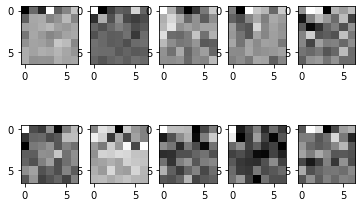

In [10]:
showMnistExamples(X_test_pca,y_test,0,7,7)